In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
hr = pd.read_csv("/Users/dominicventura/Machine Learning/Neural Network Project/hremployee.csv")

In [3]:
companyYears = hr[(hr['YearsAtCompany'] == 1) | (hr['YearsAtCompany'] == 2)]

companyYears.drop(['EmployeeCount', 
         'EmployeeNumber', 
         'Over18', 
         'StandardHours'], axis=1, inplace=True)

/Users/dominicventura/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [4]:
for column in companyYears.columns:
    if companyYears[column].dtype == np.number:
        continue
    companyYears[column] = LabelEncoder().fit_transform(companyYears[column])

/Users/dominicventura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
companyYears['Age_new'] = companyYears['Age']
companyYears = companyYears.drop('Age', axis = 1)

/Users/dominicventura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
cy_features = companyYears.iloc[:, 1:companyYears.shape[1]].values
cy_response = companyYears.iloc[:,0].values

In [7]:
feature_names = ['BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_new']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cy_features, cy_response, test_size = 0.25, random_state=3)

In [9]:
D_train = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
D_test = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

In [10]:
param = {
    'eta': 0.3, # step size shrinkage
    'tree_method': 'hist',
    'max_depth': 3,  # maximum depth of the decision trees being trained
    'objective': 'multi:softprob',  # the loss function being used
    'num_class': 2} # the number of classes in the dataset

steps = 100  # The number of training iterations

In [11]:
model = xgb.train(param, D_train, steps)

In [12]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

In [24]:
print("Accuracy: {}".format(accuracy_score(y_test, best_preds)))
print("Precision:", metrics.precision_score(y_test, best_preds))
print("Recall:", metrics.recall_score(y_test, best_preds))

Accuracy: 0.8133333333333334
Precision: 0.7692307692307693
Recall: 0.47619047619047616


Text(0.5, 257.44, 'Predicted label')

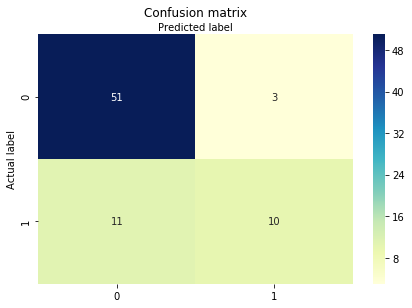

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, best_preds)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.01, 0.05, 0.10, 0.15, 0.20 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 7, 8, 9, 10],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], # gamma parameter can also help with controlling overfitting
     "colsample_bytree" : [ 0.5, 0.6, 0.7 , 0.8, 0.9, 1 ],
     "scale_pos_weights": [1, 2, 3, 4, 5]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="accuracy",
                    cv=3)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
             

In [34]:
print(grid.best_params_)

{'colsample_bytree': 0.5, 'eta': 0.01, 'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 5, 'scale_pos_weights': 1}


In [35]:
optimized_boost = grid.best_estimator_
optimized_boost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.01, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scale_pos_weights=1, seed=None, silent=None, subsample=1,
              verbosity=1)

In [41]:
optimized_boost.score(X_train, y_train)

0.9461883408071748

In [42]:
preds = optimized_boost.predict(X_test)

In [43]:
print("Accuracy: {}".format(accuracy_score(y_test, preds)))
print("Precision:", metrics.precision_score(y_test, preds))
print("Recall:", metrics.recall_score(y_test, preds))

Accuracy: 0.8266666666666667
Precision: 0.7857142857142857
Recall: 0.5238095238095238


Text(0.5, 257.44, 'Predicted label')

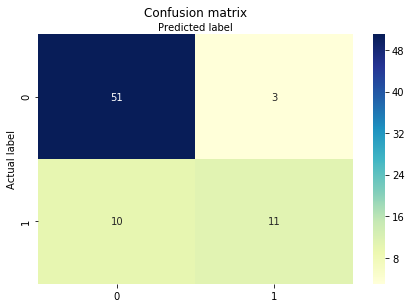

In [44]:
cnf_matrix2 = metrics.confusion_matrix(y_test, preds)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [46]:
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(optimized_boost, cy_features, cy_response, cv=kfold, scoring='accuracy')

/Users/dominicventura/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [47]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 75.10% (8.04%)


 222 of the 296 response values were correctly predicted.

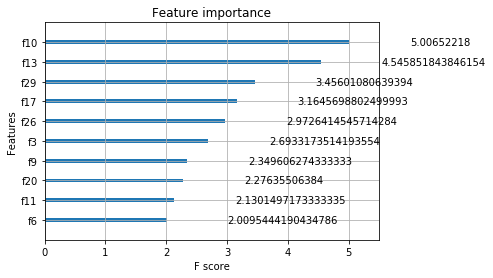

In [48]:
plot_importance(optimized_boost, importance_type = 'gain', max_num_features = 10) # ”gain” is the average gain of 
                                                                                  #  splits which use the feature
plt.show()

f10: JobLevel
    

f13: MaritalStatus


f29: Age_new
    

f17: OverTime
    

f26: YearsInCurrentRole
    

f3: DistanceFromHome
    
    
f9: JobInvolvement
    
    
f20: RelationshipSatisfaction
    
    
f11: PercentSalaryHike
    
        
f6: EnvironmentSatisfaction
    
